In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb


In [29]:
df= pd.read_csv('/Users/pankhudisingh/Desktop/ds_vscode/datasets/c_churn.csv')
print(df.head(5))

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [31]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [32]:
df.isnull().sum()
df = df.dropna().reset_index(drop=True)

In [33]:
df=df.drop('customerID', axis=1)
print(df.head(5))

   gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   
1    Male              0      No         No      34          Yes   
2    Male              0      No         No       2          Yes   
3    Male              0      No         No      45           No   
4  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No  

In [34]:
#pd.get_dummies(df, columns=['Partner','Dependents', 'PhoneService'], drop_first=0)

new=['Partner','Dependents','PhoneService','PaperlessBilling','Churn']
df[new]=df[new].replace({'Yes':1, 'No':0})
new_1= ['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']
df[new_1]=df[new_1].replace({'Yes':1, 'No':0,'No internet service':2 })

print(df.head(15))

    gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0   Female              0        1           0       1             0   
1     Male              0        0           0      34             1   
2     Male              0        0           0       2             1   
3     Male              0        0           0      45             0   
4   Female              0        0           0       2             1   
5   Female              0        0           0       8             1   
6     Male              0        0           1      22             1   
7   Female              0        0           0      10             0   
8   Female              0        1           0      28             1   
9     Male              0        0           1      62             1   
10    Male              0        1           1      13             1   
11    Male              0        0           0      16             1   
12    Male              0        1           0      58          

/var/folders/gr/4r3fxxlj3j1b3v_0r561bppw0000gn/T/ipykernel_14699/3282537216.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[new]=df[new].replace({'Yes':1, 'No':0})
/var/folders/gr/4r3fxxlj3j1b3v_0r561bppw0000gn/T/ipykernel_14699/3282537216.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[new_1]=df[new_1].replace({'Yes':1, 'No':0,'No internet service':2 })


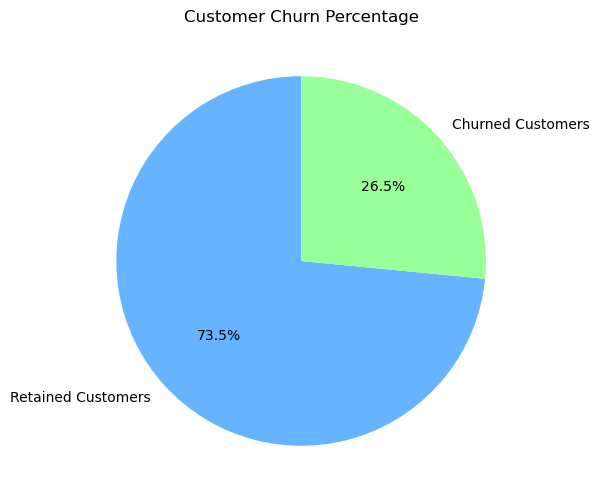

In [35]:
churn_counts= df['Churn'].value_counts()

plt.figure(figsize=(6,6))
labels= ['Retained Customers', 'Churned Customers']
plt.pie(churn_counts, labels= labels, autopct='%1.1f%%', startangle=90, colors= ['#66b3ff','#99ff99'])
plt.title('Customer Churn Percentage') 
plt.show()
        


**Customer Churn Percentage – Key Insights**
- Overall **churn rate is ~26.5%**, indicating that roughly **1 in 4 customers discontinue** services.
- Retention rate stands at **~73.5%**, showing that the majority of the customer base remains loyal.
- The churn percentage is high enough to merit focused retention strategies, especially given the competitive nature of the industry.
- This metric serves as a *baseline KPI* for evaluating the effectiveness of future interventions and predictive modeling.
- In the subsequent analysis, we will explore feature-level patterns (e.g., payment methods, contract type, tenure, Payment Type) to uncover the drivers behind this churn rate.

In [36]:
churn_rate= df['Churn'].mean()*100
print(churn_rate)

26.536987079369588


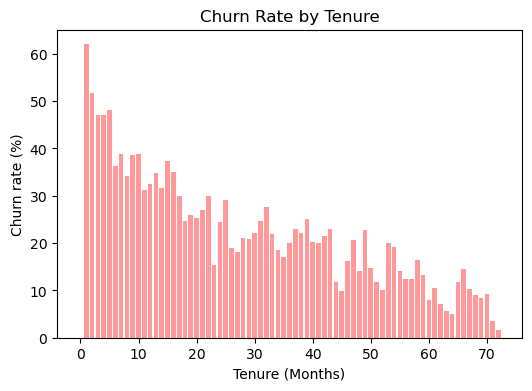

In [37]:
tenure_churn= df.groupby('tenure')['Churn'].mean()*100

plt.figure(figsize=(6,4))
plt.bar(tenure_churn.index, tenure_churn.values, width= 0.8, color= '#ff9999')
plt.xlabel('Tenure (Months)')
plt.ylabel('Churn rate (%)')
plt.title('Churn Rate by Tenure')
plt.show()



**Churn Rate by Tenure Analysis**

Customers with a *tenure of 0–6 months* show the **highest churn rates**, often **exceeding 50%**, highlighting a significant *onboarding and early engagement gap*. Churn decreases steadily with tenure, suggesting that customers retained beyond the first year are considerably more likely to remain loyal. Focused *retention strategies in the early lifecycle* could substantially reduce overall churn.

In [38]:
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [39]:
new_2=['Contract']
df[new_2]= df[new_2].replace({'Month-to-month':0, 'One year':1, 'Two year':2})
print(df['Contract'].head(5))

0    0
1    1
2    0
3    1
4    0
Name: Contract, dtype: int64


/var/folders/gr/4r3fxxlj3j1b3v_0r561bppw0000gn/T/ipykernel_14699/3366927982.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[new_2]= df[new_2].replace({'Month-to-month':0, 'One year':1, 'Two year':2})


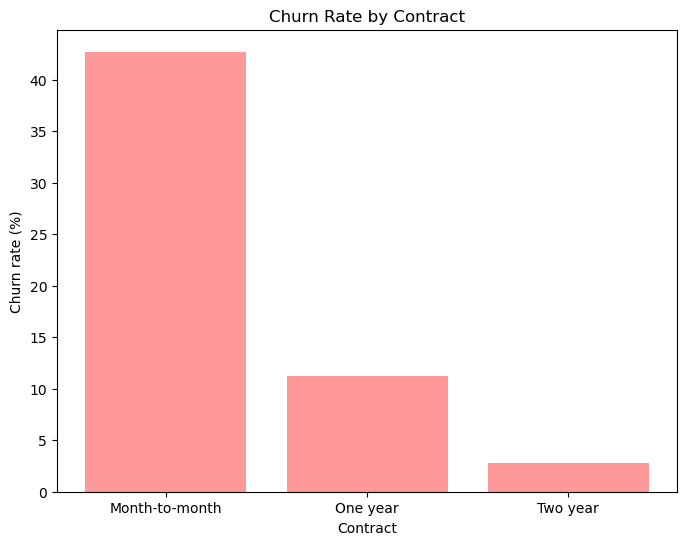

In [40]:
contract_churn= df.groupby('Contract')['Churn'].mean()*100
plt.figure(figsize=(8,6))
plt.bar(contract_churn.index, contract_churn.values, width= 0.8, color= '#ff9999')
plt.xticks(
    ticks=[0,1,2],
    labels=['Month-to-month', 'One year', 'Two year']
)
plt.xlabel('Contract')
plt.ylabel('Churn rate (%)')
plt.title('Churn Rate by Contract')
plt.show()

**Churn Rate by Contract Analysis**

Customers on *month-to-month contracts* have the *highest* churn rate at *over 40%*, indicating low long-term commitment and high switching flexibility. In contrast, one-year and two-year contracts show significantly lower churn rates (~11% and ~3%, respectively), highlighting the retention benefits of longer-term agreements. Encouraging customers to migrate from short-term to longer-term contracts could be a highly effective churn reduction strategy.

In [41]:
df['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [42]:
new_3=['PaymentMethod']
df[new_3]=df[new_3].replace({'Electronic check': 0, 'Mailed check':1, 'Bank transfer (automatic)':2,'Credit card (automatic)':3})


/var/folders/gr/4r3fxxlj3j1b3v_0r561bppw0000gn/T/ipykernel_14699/4212010735.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[new_3]=df[new_3].replace({'Electronic check': 0, 'Mailed check':1, 'Bank transfer (automatic)':2,'Credit card (automatic)':3})


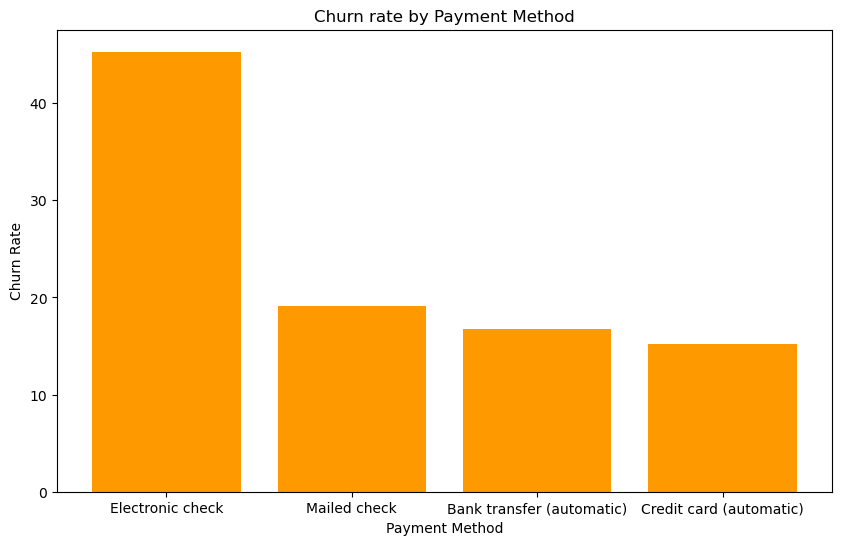

In [43]:
Payment_churn= df.groupby('PaymentMethod')['Churn'].mean()*100

plt.figure(figsize=(10,6))
plt.bar(Payment_churn.index, Payment_churn.values,width=0.8, color='#ff9900')
plt.xticks(
    ticks=[0,1,2,3],
    labels=['Electronic check', 'Mailed check', 'Bank transfer (automatic)','Credit card (automatic)']
)
plt.xlabel('Payment Method')
plt.ylabel('Churn Rate')
plt.title('Churn rate by Payment Method')
plt.show()

**Churn Rate by Payment Method Analysis**

Customers paying via *electronic check* have the **highest churn rate (~46%)**, far above other payment methods. This suggests possible issues such as security concerns or lower convenience. In contrast, automatic payments and mailed checks show much lower churn, indicating higher customer stability. Encouraging a shift from electronic checks to more stable payment options could help reduce churn.

In [44]:
df['InternetService'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

/var/folders/gr/4r3fxxlj3j1b3v_0r561bppw0000gn/T/ipykernel_14699/3649868711.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[new_4]=df[new_4].replace({'DSL': 1, 'Fiber optic':2, 'No':0})


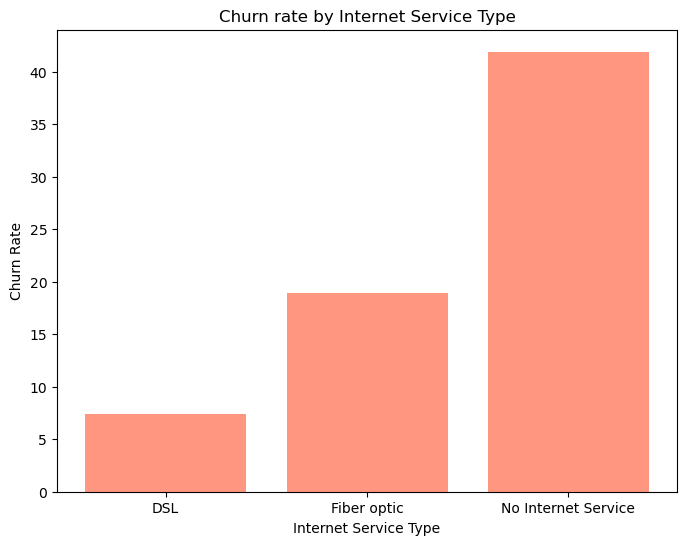

In [45]:
new_4=['InternetService']
df[new_4]=df[new_4].replace({'DSL': 1, 'Fiber optic':2, 'No':0})

Is_churn= df.groupby('InternetService')['Churn'].mean()*100

plt.figure(figsize=(8,6))
plt.bar(Is_churn.index, Is_churn.values,width=0.8, color='#ff9780')
plt.xticks(
    ticks=[0,1,2],
    labels=['DSL', 'Fiber optic', 'No Internet Service']
)
plt.xlabel('Internet Service Type')
plt.ylabel('Churn Rate')
plt.title('Churn rate by Internet Service Type')
plt.show()


**Churn Rate by Internet Service Type**
Customers with *no internet service* show the *highest churn rate (~42%)*, indicating limited service engagement. *Fiber optic* customers experience a moderate churn *(~19%)*, which could be linked to *competitive offerings* or pricing concerns. *DSL* customers demonstrate the *lowest churn (~7%)*, suggesting higher satisfaction or fewer alternative options. Strategies aimed at improving fiber optic service quality and converting non-internet users could help reduce overall churn.

In [46]:
nm_df=df.select_dtypes(include=['number'])

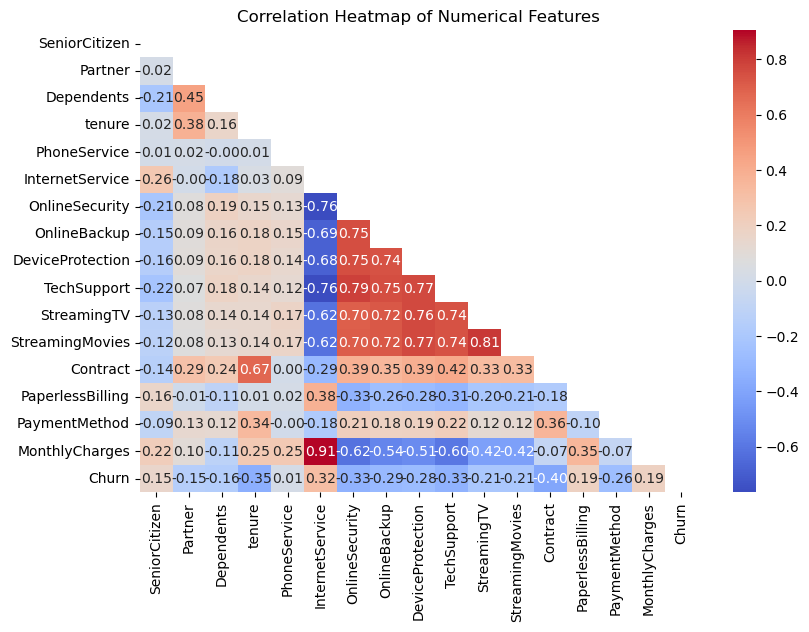

In [47]:
corr_matrix = nm_df.corr()
ut = np.triu(np.ones_like(corr_matrix, dtype=bool))
plt.figure(figsize=[9,6])
sns.heatmap(corr_matrix, mask=ut, annot=True, cmap='coolwarm', fmt= ".2f") 
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

**Correlation Heatmap of Numerical Features**
The heatmap reveals several patterns:
1) *Tenure and Churn show a strong negative correlation*, meaning longer-term customers are less likely to leave—loyalty builds over time.
2) *Online security–related services* (OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport) are *strongly correlated* with each other, suggesting they’re *often bundled*. Their mild negative correlation with churn implies such add-ons improve retention.
3) *Contract length* has a noticeable *negative correlation with churn*, supporting the idea that longer commitments improve customer stickiness.
4) *MonthlyCharges correlate positively with high-speed InternetService types* (especially Fiber optic) but are not directly predictive of churn alone, hinting at a *possible price–value balance effect*.

These insights can guide retention strategies—focusing on early tenure engagement, upselling security bundles, and promoting longer-term contracts.

In [48]:
# Feature Engineering
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce') 
df['tenure']= pd.to_numeric(df['tenure'], errors='coerce')
#print((df['tenure'] == 0).sum())

df['tenure'].isnull()
df['TotalCharges_permonth'] = df['TotalCharges'] / df['tenure']

def Tenure_category(tenure):
    if tenure == 0:
        return "Brand new"
    elif tenure<= 6:
        return 'New'
    elif tenure <= 24:
        return 'Moderate'
    else:
        return 'Long Term'
    
df['Tenure_category']= df['tenure'].apply(Tenure_category)


In [49]:
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(threshold=0.01)
selector.fit(df.select_dtypes(include=['number']))

keep_cols= df.select_dtypes(include=['number']).columns[selector.get_support()] 
df = df[keep_cols.tolist() + df.select_dtypes(exclude=['number']).columns.tolist()] # to keep only high variance columns

print(df.head(15))

    SeniorCitizen  Partner  Dependents  tenure  PhoneService  InternetService  \
0               0        1           0       1             0                1   
1               0        0           0      34             1                1   
2               0        0           0       2             1                1   
3               0        0           0      45             0                1   
4               0        0           0       2             1                2   
5               0        0           0       8             1                2   
6               0        0           1      22             1                2   
7               0        0           0      10             0                1   
8               0        1           0      28             1                2   
9               0        0           1      62             1                1   
10              0        1           1      13             1                1   
11              0        0  

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, roc_auc_score

X= df.drop('Churn', axis=1)
y= df['Churn']
X_encoded = pd.get_dummies(X, drop_first=True)
X_encoded = X_encoded.fillna(X_encoded.mean())

X_train, X_test, y_train, y_test= train_test_split(X_encoded ,y, test_size= 0.2, random_state= 42, stratify=y)

model= LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred= model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:,1]

metrics= { "Accuracy": accuracy_score(y_test, y_pred), 
          "Precision": precision_score(y_test, y_pred),
          "F1 Score": f1_score(y_test, y_pred),
          "Recall": recall_score(y_test, y_pred),
          "ROC_AUC": roc_auc_score(y_test, y_pred_prob)
          }


for metric, value in metrics.items():
    print(f"{metric}: {value :.4f}")

Accuracy: 0.8027
Precision: 0.6569
F1 Score: 0.5912
Recall: 0.5374
ROC_AUC: 0.8447


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**ANALYSIS: LOGISTIC REGRESSION**

In [51]:
from sklearn.ensemble import RandomForestClassifier

rf_model= RandomForestClassifier( random_state=42) #initialising

rf_model.fit(X_train, y_train) #training the model

y_pred_rf= rf_model.predict(X_test) # prediction
y_pred_rf_prob= rf_model.predict_proba(X_test)[:,1] 

rf_metrics= {
    "Accuracy" : accuracy_score(y_test, y_pred_rf),
    "Recall": recall_score(y_test, y_pred_rf),
    "Precision": precision_score(y_test, y_pred_rf),
    "F1 Score": f1_score(y_test, y_pred_rf),
    "ROC-AUC": roc_auc_score(y_test, y_pred_rf_prob)
    }

for metric, values in rf_metrics.items():
    print(f"{metric} : {value:.4f}")


Accuracy : 0.8447
Recall : 0.8447
Precision : 0.8447
F1 Score : 0.8447
ROC-AUC : 0.8447


**ANALYSIS: RANDOM FOREST CLASSIFIER**

In [52]:
from xgboost import XGBClassifier

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)
y_pred_xgb_prob = xgb.predict_proba(X_test)[:, 1]

xgb_metrics = {
    "Accuracy": accuracy_score(y_test, y_pred_xgb),
    "Precision": precision_score(y_test, y_pred_xgb),
    "Recall": recall_score(y_test, y_pred_xgb),
    "F1 Score": f1_score(y_test, y_pred_xgb),
    "ROC_AUC": roc_auc_score(y_test, y_pred_xgb_prob)
}

for metric, values in xgb_metrics.items():
    print(f"{metric} : {value:.4f}")

Accuracy : 0.8447
Precision : 0.8447
Recall : 0.8447
F1 Score : 0.8447
ROC_AUC : 0.8447


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:45:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


**ANALYSIS: XG BOOST**

In [57]:
# comparision of the models

results = {
    "Logistic Regression": metrics,      
    "Random Forest": rf_metrics,
    "XGBoost": xgb_metrics
}

df_results = pd.DataFrame(results)
print(df_results)

           Logistic Regression  Random Forest   XGBoost
Accuracy              0.802697       0.792051  0.776437
Precision             0.656863       0.635452  0.591900
F1 Score              0.591176       0.564636  0.546763
Recall                0.537433       0.508021  0.508021
ROC_AUC               0.844664            NaN  0.821768
ROC-AUC                    NaN       0.823611       NaN


In [59]:
from sklearn.model_selection import GridSearchCV

grid_param = {
    "n_estimators": [100, 200, 300],
    "max_depth": [None, 5, 10],
    "min_samples_split": [2, 5, 10]
}

grid_search = GridSearchCV(
    estimator= RandomForestClassifier(random_state=42),
    param_grid=grid_param,
    cross_valid=3,  # 3-fold cross-validation
    scoring="f1",
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best CV Score:", grid_search.best_score_)

best_rf = grid_search.best_estimator_


Best Parameters: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 100}
Best CV Score: 0.5850254092773847


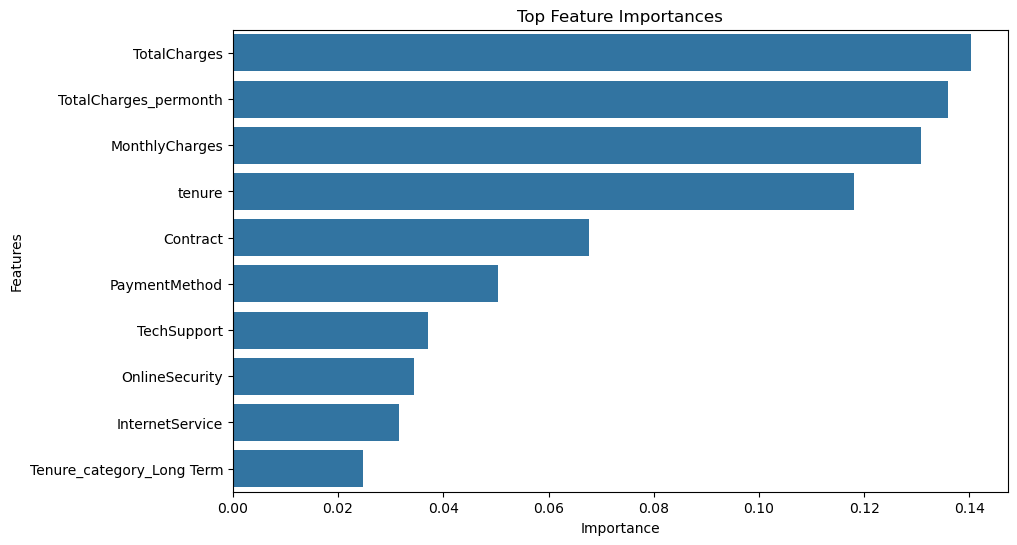

In [70]:
#feature importances
importances= rf_model.feature_importances_
feature_names= X_encoded.columns

f_imp= pd.DataFrame({
    'Features': feature_names,
    'Importance': importances
})
f_imp = f_imp.sort_values(by='Importance', ascending=False)


plt.figure(figsize=(10,6))
sns.barplot(x="Importance", y="Features", data=f_imp.head(10))
plt.title("Top Feature Importances")
plt.show()

**TOP 5 FEATURES THAT DETERMINE CHURN RATE**
1. Total Charges/ Total Charges per month/ Monthly Charges
2. Tenure
3. Contract
4. Payment Method
5. Tech support


In [71]:
top_features = f_imp.head(5)
print("Top 5 Churn Predictors:")
print(top_features)

Top 5 Churn Predictors:
                 Features  Importance
16           TotalCharges    0.140315
17  TotalCharges_permonth    0.135927
15         MonthlyCharges    0.130770
3                  tenure    0.118036
12               Contract    0.067674
